<a href="https://colab.research.google.com/github/hussamshakarnah1/Computer-Vision/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')# ignore warnings
from sklearn.datasets import fetch_lfw_people # this is the dataset
# get the data, with 60 images per person
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


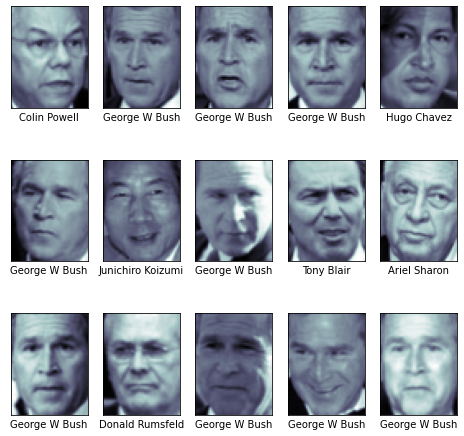

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5,figsize=(8,8))
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[],
      xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# create dimenssion reduction
pca = PCA(n_components=150, whiten=True, random_state=42)
# create your SVM model with RBF kernel
svc = SVC(kernel='rbf', class_weight='balanced')
# your pipline
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split
# random_state is for results reproduction
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
random_state=42)

In [ ]:
# check the shape of the data
print(f'The size of the Training set is {X_train.shape[0]}')
print(f'The size of the Training set is {X_test.shape[0]}')
# notice the number of column in the dataset
print(f'The number of columns in the training and testing set is {X_train.shape[1]}')

The size of the Training set is 1011
The size of the Training set is 337
The number of columns in the training and testing set is 2914


In [ ]:
 # You should know the data types of X_train / y_train (numpy array)
print(f'Type of X_train {type(X_train)}')
print(f'Type of y_train {type(y_train)}')

Type of X_train <class 'numpy.ndarray'>
Type of y_train <class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [ ]:
warnings.filterwarnings('ignore')# ignore warnings
grid.fit(X_train, y_train)
best_params = grid.best_params_

In [ ]:
print(best_params)

{'svc__C': 10, 'svc__gamma': 0.001}


In [ ]:
# best model we have
model = grid.best_estimator_
y_predicted = model.predict(X_test)

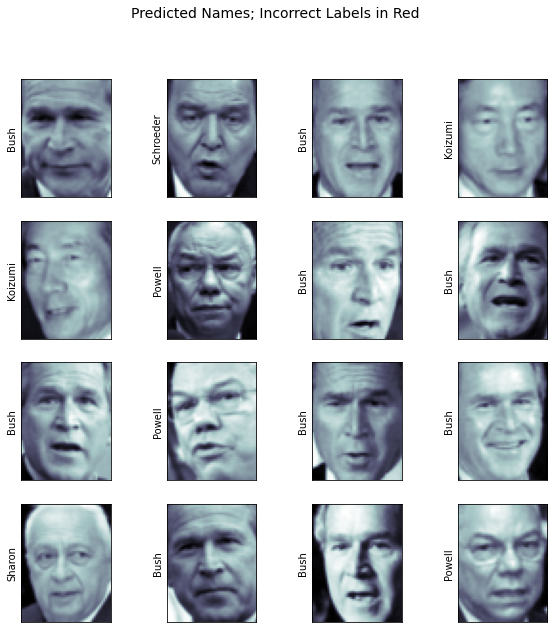

In [ ]:
fig, ax = plt.subplots(4, 4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1],
          color='black' if y_predicted[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14); 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted,
target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



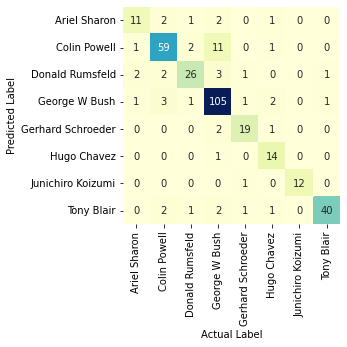

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# compare the actual label against the predicted label
mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,cmap="YlGnBu",
    xticklabels=faces.target_names,
    yticklabels=faces.target_names)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');

In [ ]:
import pickle
# Save to file in the current working directory
pkl_filename = "svm_model.pkl"
# save your model that was created above (lg_model)
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)  

In [ ]:
 # Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
# Lets test the mode loaded from a file and check results
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_hat = pickle_model.predict(X_test)

Test score: 84.87 %


In [ ]:
# you can save your test set as a data frame as below
import pandas as pd
df = pd.DataFrame(X_test)
# add the label
df['Label']=y_test
# save to csv
df.to_csv('Xy_test.csv', index=False)

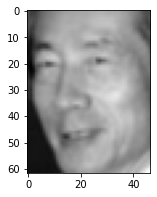

In [ ]:
# set figure size
fig = plt.figure(figsize=(3,3))
# split features and labels into two differen dataframes
features = df.loc[:, df.columns != 'Label']
labels = df['Label'].to_numpy()
# Change i to view different images
i = 4
# notice we convert it to numpy array and reshape it
image_to_show = features.iloc[i].to_numpy()
# reshape it to fit our model
image_to_show = image_to_show.reshape(62,47)
#fig.suptitle('This is ',labels[0:1], size=14);
label= faces.target_names[labels[i]]
if 1==1:
   color='black'
else:
   color = 'red'
#fig.suptitle(label, size=14);
plt.imshow(image_to_show, cmap=plt.get_cmap('gray'))
plt.show()

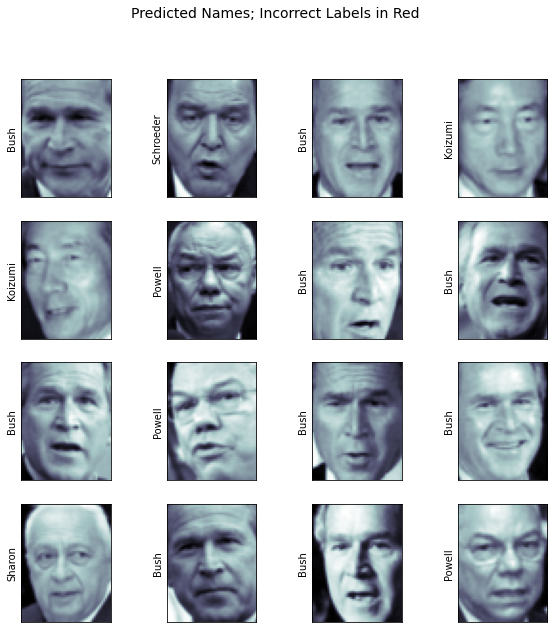

In [ ]:
y_predictedp = pickle_model.predict(X_test)
fig, ax = plt.subplots(4, 4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
  axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1],
               color='black' if y_predictedp[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);